In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics
from scikeras.wrappers import KerasRegressor
import scikeras

import numpy as np

In [2]:
df = pd.read_csv('C:/Users/Эдуард/Desktop/sales/train.csv')
df_oil = pd.read_csv('C:/Users/Эдуард/Desktop/sales/oil.csv')
df_holidays = pd.read_csv('C:/Users/Эдуард/Desktop/sales/holidays_events.csv')
df_stores = pd.read_csv('C:/Users/Эдуард/Desktop/sales/stores.csv')
df_transactions = pd.read_csv('C:/Users/Эдуард/Desktop/sales/transactions.csv')
df_test = pd.read_csv('C:/Users/Эдуард/Desktop/sales/test.csv')

In [3]:
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
df_holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [5]:
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [6]:
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [7]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


----------------------------------------------------------------------

In [8]:
df_copy = df.copy()

In [9]:
df_stores_copy = df_stores.copy()

In [10]:
df_copy = df_copy.merge(df_stores_copy[['store_nbr', 'city', 'state', 'type', 'cluster']], on='store_nbr', how='left')

In [11]:
df_test = df_test.merge(df_stores_copy[['store_nbr', 'city', 'state', 'type', 'cluster']], on='store_nbr', how='left')

In [12]:
df_copy

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


In [13]:
df_oil_copy = df_oil.copy()

In [14]:
df_copy = df_copy.merge(df_oil_copy[['date', 'dcoilwtico']], on='date', how='left')

In [15]:
df_test = df_test.merge(df_oil_copy[['date', 'dcoilwtico']], on='date', how='left')

In [16]:
df_copy

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57


In [17]:
df_holidays_copy = df_holidays.copy()

In [18]:
df_holidays_copy

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [19]:
df_holidays_copy['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [20]:
df_copy.rename(columns={'dcoilwtico': 'oil_price'}, inplace=True)

In [21]:
df_test.rename(columns={'dcoilwtico': 'oil_price'}, inplace=True)

In [22]:
df_copy

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,oil_price
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57


In [23]:
work_days = (df_holidays_copy['type'] == 'Work Day') | (df_holidays_copy['transferred'] == True)
special_days_df = df_holidays_copy.drop(df_holidays_copy[work_days].index)
special_days_df['special_days'] = 1

special_days_df = special_days_df.drop(['type', 'description', 'transferred'], axis=1)
special_days_df = special_days_df.drop(special_days_df[special_days_df['date'].duplicated()].index)

In [24]:
special_days_df

,date,locale,locale_name,special_days
0,2012-03-02,Local,Manta,1
1,2012-04-01,Regional,Cotopaxi,1
2,2012-04-12,Local,Cuenca,1
3,2012-04-14,Local,Libertad,1
4,2012-04-21,Local,Riobamba,1
...,...,...,...,...
344,2017-12-22,Local,Salinas,1
346,2017-12-23,National,Ecuador,1
347,2017-12-24,National,Ecuador,1
348,2017-12-25,National,Ecuador,1


In [25]:
special_days_df['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [26]:
local_special_days_df = special_days_df[special_days_df['locale'] == 'Local']
regional_special_days_df = special_days_df[special_days_df['locale'] == 'Regional']
national_special_days_df = special_days_df[special_days_df['locale'] == 'National']

In [27]:
national_special_days_df = national_special_days_df.drop(['locale', 'locale_name'], axis=1)

In [28]:
df_copy = df_copy.merge(national_special_days_df, on='date', how='left')

In [29]:
df_test = df_test.merge(national_special_days_df, on='date', how='left')

In [30]:
df_copy

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,oil_price,special_days
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,1.0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,1.0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,1.0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,1.0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,NaN
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,NaN
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,NaN
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,NaN


In [31]:
for i, j in zip(regional_special_days_df.date, regional_special_days_df.locale_name):
    df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
    df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\369956487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\369956487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\369956487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\369956487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\369956487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\369956487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [32]:
for i, j in zip(local_special_days_df.date, local_special_days_df.locale_name):
    df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
    df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['special_days'][((df_copy['date'] == i) & (df_copy['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['special_days'][((df_test['date'] == i) & (df_test['state'] == j))] = 1
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_9168\3380689578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [33]:
df_copy = df_copy.merge(df_transactions, on=['date', 'store_nbr'], how='left')

In [34]:
df_test = df_test.merge(df_transactions, on=['date', 'store_nbr'], how='left')

In [35]:
df_copy['transactions'] = df_copy['transactions'].fillna(0)
df_copy['special_days'] = df_copy['special_days'].fillna(0)
df_copy['oil_price'] = df_copy['oil_price'].fillna(df_copy['oil_price'].median())

In [36]:
df_copy['oil_price'] = df_copy['oil_price'] - df_copy['oil_price'].mean()

In [37]:
df_test['transactions'] = df_test['transactions'].fillna(0)
df_test['special_days'] = df_test['special_days'].fillna(0)
df_test['oil_price'] = df_test['oil_price'].fillna(df_test['oil_price'].median())
df_test['oil_price'] = df_test['oil_price'] - df_test['oil_price'].mean()

In [38]:
df_copy

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,oil_price,special_days,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,-10.07997,1.0,0.0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,-10.07997,1.0,0.0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,-10.07997,1.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,-10.07997,1.0,0.0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,-10.07997,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,-15.83997,0.0,2155.0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,-15.83997,0.0,2155.0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,-15.83997,0.0,2155.0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,-15.83997,0.0,2155.0


In [39]:
df_copy = df_copy.drop('store_nbr', axis=1)

In [40]:
df_copy = df_copy.drop('date', axis=1)

In [41]:
df_copy = df_copy.set_index('id')

In [42]:
df_test = df_test.drop('store_nbr', axis=1)
df_test = df_test.drop('date', axis=1)
df_test = df_test.set_index('id')

In [43]:
df_copy

,family,sales,onpromotion,city,state,type,cluster,oil_price,special_days,transactions
id,,,,,,,,,,
0,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,-10.07997,1.0,0.0
1,BABY CARE,0.000,0,Quito,Pichincha,D,13,-10.07997,1.0,0.0
2,BEAUTY,0.000,0,Quito,Pichincha,D,13,-10.07997,1.0,0.0
3,BEVERAGES,0.000,0,Quito,Pichincha,D,13,-10.07997,1.0,0.0
4,BOOKS,0.000,0,Quito,Pichincha,D,13,-10.07997,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3000883,POULTRY,438.133,0,Quito,Pichincha,B,6,-15.83997,0.0,2155.0
3000884,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,-15.83997,0.0,2155.0
3000885,PRODUCE,2419.729,148,Quito,Pichincha,B,6,-15.83997,0.0,2155.0


In [44]:
df_test

,family,onpromotion,city,state,type,cluster,oil_price,special_days,transactions
id,,,,,,,,,
3000888,AUTOMOTIVE,0,Quito,Pichincha,D,13,-0.445,0.0,0.0
3000889,BABY CARE,0,Quito,Pichincha,D,13,-0.445,0.0,0.0
3000890,BEAUTY,2,Quito,Pichincha,D,13,-0.445,0.0,0.0
3000891,BEVERAGES,20,Quito,Pichincha,D,13,-0.445,0.0,0.0
3000892,BOOKS,0,Quito,Pichincha,D,13,-0.445,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3029395,POULTRY,1,Quito,Pichincha,B,6,0.015,0.0,0.0
3029396,PREPARED FOODS,0,Quito,Pichincha,B,6,0.015,0.0,0.0
3029397,PRODUCE,1,Quito,Pichincha,B,6,0.015,0.0,0.0


In [45]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   family        object 
 1   sales         float64
 2   onpromotion   int64  
 3   city          object 
 4   state         object 
 5   type          object 
 6   cluster       int64  
 7   oil_price     float64
 8   special_days  float64
 9   transactions  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 251.8+ MB


In [46]:
df_copy.describe()

,sales,onpromotion,cluster,oil_price,special_days,transactions
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,3.577757e+02,2.602770e+00,8.481481e+00,-4.977222e-14,7.463491e-02,1.555808e+03
std,1.101998e+03,1.221888e+01,4.649735e+00,2.237116e+01,2.628014e-01,1.033367e+03
min,0.000000e+00,0.000000e+00,1.000000e+00,-3.721997e+01,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,4.000000e+00,-1.436247e+01,0.000000e+00,9.300000e+02
50%,1.100000e+01,0.000000e+00,8.500000e+00,-1.007997e+01,0.000000e+00,1.331000e+03
75%,1.958473e+02,0.000000e+00,1.300000e+01,2.812503e+01,0.000000e+00,1.976250e+03
max,1.247170e+05,7.410000e+02,1.700000e+01,4.721003e+01,1.000000e+00,8.359000e+03


<AxesSubplot:xlabel='sales'>

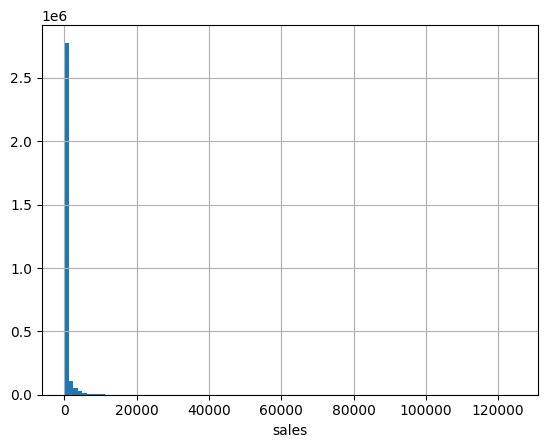

In [47]:
plt.xlabel('sales')
df_copy['sales'].hist(bins=100)

In [48]:
df_copy['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

<AxesSubplot:>

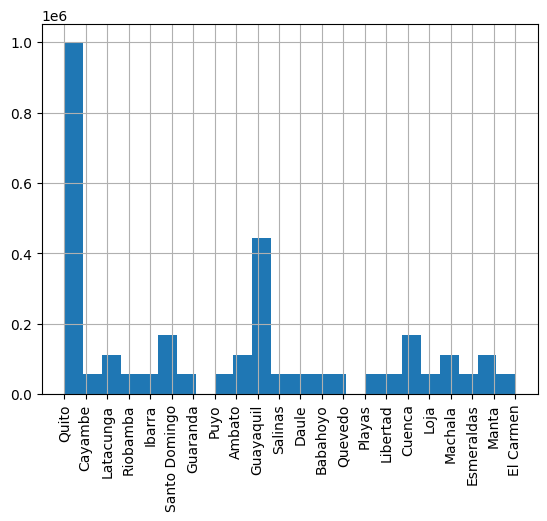

In [49]:
plt.xticks(rotation=90)
df_copy['city'].hist(bins=24)

In [50]:
df_copy['sales'].quantile(0.9)

867.0

<AxesSubplot:>

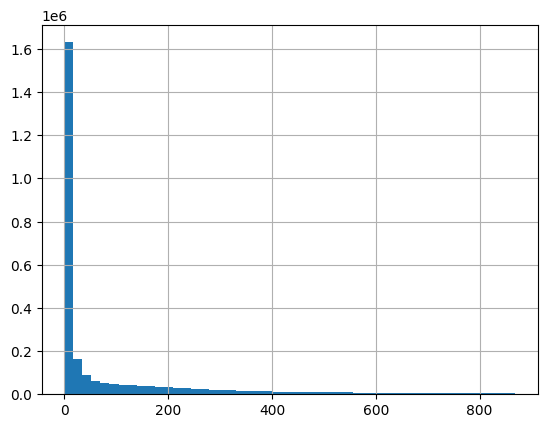

In [51]:
df_copy[df_copy['sales'] < 869]['sales'].hist(bins=50)

<AxesSubplot:>

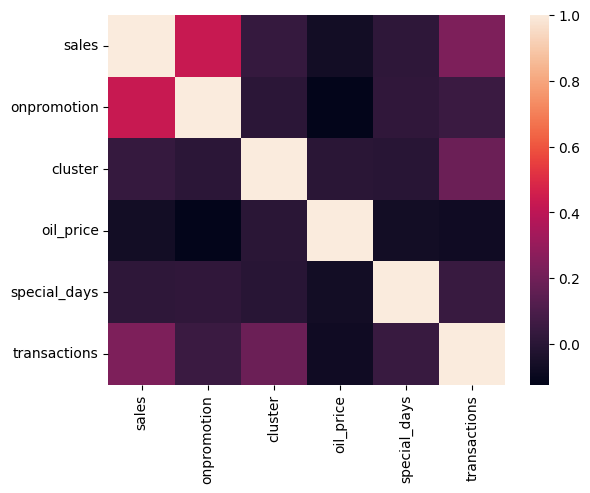

In [52]:
sns.heatmap(df_copy.corr())

# Обработка данных

In [53]:
data = df_copy[df_copy['sales'] < 869]

In [54]:
X = data.drop(['sales'], axis=1)
Y = data['sales']

In [55]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.33, random_state=42)

In [56]:
x_train = pd.get_dummies(x_train)

In [57]:
x_train

,onpromotion,cluster,oil_price,special_days,transactions,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
id,,,,,,,,,,,,,,,,,,,,,
590248,0,6,-10.07997,0.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
173253,0,6,29.95003,0.0,0.0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1533153,0,1,-2.90997,0.0,1286.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
249297,0,13,32.88003,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1401886,0,10,-10.07997,0.0,1380.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117102,0,5,28.12003,0.0,3551.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1850567,0,3,-10.07997,0.0,641.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2605515,0,3,-9.42997,0.0,636.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Модели и обучение

In [58]:
x_test = pd.get_dummies(x_test)

In [59]:
reg1 = RandomForestRegressor(n_estimators=20, max_features='auto', max_depth=20, n_jobs=-1)


In [60]:
def neunet():
    Neunet = tf.keras.Sequential([
        tf.keras.layers.Dense(50, input_dim=x_train.shape[1], activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1),
    ])
    Neunet.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return Neunet

In [61]:
nn = KerasRegressor(neunet, optimizer='adam', batch_size=30, epochs=20)

In [62]:
Ens = VotingRegressor([
    ('Forest', reg1),
    ('NeuralNetwork', nn),
])


In [63]:
Ens.fit(x_train, y_train)

C:\Users\Эдуард\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Epoch 1/20
60330/60330 [==============================] - 67s 1ms/step - loss: 8427.6992 - mean_absolute_error: 46.7065
Epoch 2/20
60330/60330 [==============================] - 67s 1ms/step - loss: 5319.3789 - mean_absolute_error: 35.0453
Epoch 3/20
60330/60330 [==============================] - 66s 1ms/step - loss: 4832.0269 - mean_absolute_error: 33.0509
Epoch 4/20
60330/60330 [==============================] - 66s 1ms/step - loss: 4571.5059 - mean_absolute_error: 32.0460
Epoch 5/20
60330/60330 [==============================] - 67s 1ms/step - loss: 4374.0039 - mean_absolute_error: 31.2759
Epoch 6/20
60330/60330 [==============================] - 66s 1ms/step - loss: 4238.9409 - mean_absolute_error: 30.7500
Epoch 7/20
60330/60330 [==============================] - 67s 1ms/step - loss: 4108.9141 - mean_absolute_error: 30.2564
Epoch 8/20
60330/60330 [==============================] - 67s 1ms/step - loss: 3995.6274 - mean_absolute_error: 29.7579
Epoch 9/20
60330/60330 [================

VotingRegressor(estimators=[('Forest',
                             RandomForestRegressor(max_depth=20,
                                                   max_features='auto',
                                                   n_estimators=20,
                                                   n_jobs=-1)),
                            ('NeuralNetwork',
                             KerasRegressor(batch_size=30, epochs=20, model=<function neunet at 0x0000026B066EE710>, optimizer='adam'))])

In [64]:
metrics.mean_absolute_error(y_train, Ens.predict(x_train))

60330/60330 [==============================] - 45s 745us/step


22.161051137812287

In [65]:
metrics.mean_absolute_error(y_test, Ens.predict(x_test))

29715/29715 [==============================] - 23s 772us/step


23.63310324089628

In [66]:
y_test.iloc[0]

12.0

In [67]:
Ens.predict(x_test[0:1])

1/1 [==============================] - 0s 20ms/step


array([5.6260126])

# Submission

In [68]:
df_test = pd.get_dummies(df_test)

In [69]:
df_test

,onpromotion,cluster,oil_price,special_days,transactions,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
id,,,,,,,,,,,,,,,,,,,,,
3000888,0,13,-0.445,0.0,0.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3000889,0,13,-0.445,0.0,0.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3000890,2,13,-0.445,0.0,0.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3000891,20,13,-0.445,0.0,0.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3000892,0,13,-0.445,0.0,0.0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,1,6,0.015,0.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3029396,0,6,0.015,0.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3029397,1,6,0.015,0.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [70]:
y_pred = Ens.predict(df_test)
output = pd.DataFrame({'id': df_test.index, 'sales': np.round(y_pred, 0)})
output.to_csv('submission.csv', index=False)

951/951 [==============================] - 1s 1ms/step


In [71]:
pd.read_csv('submission.csv')

,id,sales
0,3000888,2.0
1,3000889,2.0
2,3000890,18.0
3,3000891,654.0
4,3000892,2.0
...,...,...
28507,3029395,269.0
28508,3029396,1.0
28509,3029397,293.0
28510,3029398,61.0
